<a href="https://colab.research.google.com/github/stevecwb/Resist-ncia-dos-Materiais/blob/main/Primeira_Atividade_Computacional_(C1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM423 - Atividade Computacional I

Estevão Sanches Rodrigues, 168030



# Bibliotecas Importadas


In [276]:
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

# Definição das Funções de Singularidade

As funções recebem como entrada o valor $x$ e um valor $a$ que no caso representa o ponto de partida da função: $<x-a>^n$.

In [277]:
def heaviside_constant(x,a):
  # função singular com n = 0
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**0

def heaviside_triangular(x,a):
  # função singular com n = 1
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**1

def heaviside_quadratic(x,a):
  # função singular com n = 2
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**2

def heaviside_cubic(x,a):
  # função singular com n = 3
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**3

# Dados de Entrada

In [278]:
q0 = 77 # kN/m
a = 3.2 # m
b = 4.1 # m

## Letra A

Primeiro, usando as expressões que foram calculas, define-se as funções no script:
$$\begin{gather*}
    \boxed{V_y(x)=-q_0<x>^1-\dfrac{q_0}{2b}<x-a>^2 + q_0\left(a+\dfrac{2b}{3}\right)\quad\forall\quad 0\leq x\leq L}\\
    \boxed{M_z(x)=-\dfrac{q_0}{2}<x>^2-\dfrac{q_0}{6b}<x-a>^3+q_0\left(a+\dfrac{2b}{3}\right)x-q_0\left(\dfrac{a^2}{2}+\dfrac{2ab}{3}\right)\quad\forall\quad0\leq x\leq L}
\end{gather*}$$

In [279]:
def forca_cortante_letraA(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,0))-(q0/(2*b))*(heaviside_quadratic(x,a))+q0*(a+2*b/3)
  return Vy

def momento_cortante_letraA(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))-(q0/(6*b))*(heaviside_cubic(x,a))+q0*(a+2*b/3)*x-q0*((a**2)/2+(2*a*b)/3)
   return Mz

Em seguida, determina-se as reações no engaste, no apoio deslizante
e a força cortante na rótula:

In [280]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ','{:.1f}'.format(forca_cortante_letraA(reacoes[i],q0,a,b)), 'kN')
  print('Momento no', i,': ','{:.1f}'.format(momento_cortante_letraA(reacoes[i],q0,a,b)),' kN*m \n')


Força no Engaste :  456.9 kN
Momento no Engaste :  -1067.7  kN*m 

Força no Rótula :  210.5 kN
Momento no Rótula :  0.0  kN*m 

Força no Apoio Deslizante :  -263.1 kN
Momento no Apoio Deslizante :  -0.0  kN*m 



Por fim, os diagramas de esforços internos:

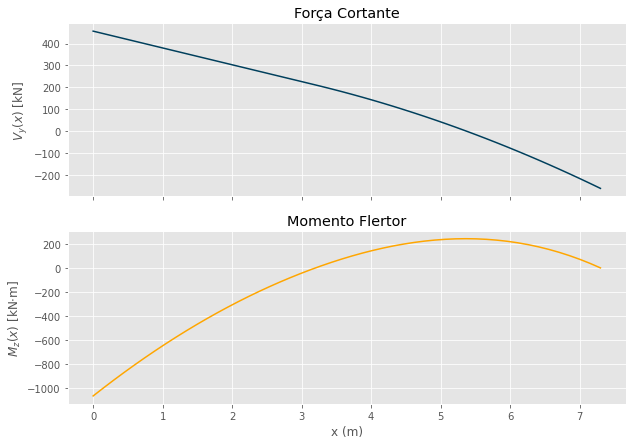

In [281]:
x = np.array(np.linspace(0,a+b,50))

Vy = np.empty(50)
Mz = np.empty(50)
for i in range(50):
  k = forca_cortante_letraA(x[i], q0, a ,b)
  k1 = momento_cortante_letraA(x[i], q0, a ,b)
  Vy[i] = k
  Mz[i] = k1

#print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].plot(x, Vy, c='#003f5c')
axs[0].set_title('Força Cortante')
axs[0].set_ylabel('$V_y(x)$ [kN]')
axs[1].plot(x, Mz, c='#ffa600')
axs[1].set_title('Momento Flertor')
axs[1].set_ylabel('$M_z(x)$ [kN$\cdot$m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Letra B

### Carregamento de AB

Expressões calculadas: 
# $$\begin{gather*}{V_y(x)= -q_0<x-0>^1+q_0<x-a>^1+q_0a}\\{M_z(x)=-\dfrac{q_0}{2}<x-0>^2+\dfrac{q_0}{2}<x-a>^2+q_0ax-\dfrac{q_0}{2}a^2}\end{gather*}$$

In [282]:
def forca_cortante_letraB_AB(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,0))+(q0)*(heaviside_triangular(x,a))+q0*a
  return Vy

def momento_cortante_letraB_AB(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))+(q0/(2))*(heaviside_quadratic(x,a))+q0*(a)*x-q0*((a**2)/2)
   return Mz

Em seguida, determina-se as reações no engaste, no apoio deslizante e a força cortante na rótula:

In [283]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ','{:.1f}'.format(forca_cortante_letraB_AB(reacoes[i],q0,a,b), 'kN'))
  print('Momento no', i,': ','{:.1f}'.format(momento_cortante_letraB_AB(reacoes[i],q0,a,b)),' kN*m \n')


Força no Engaste :  246.4
Momento no Engaste :  -394.2  kN*m 

Força no Rótula :  0.0
Momento no Rótula :  -0.0  kN*m 

Força no Apoio Deslizante :  -0.0
Momento no Apoio Deslizante :  -0.0  kN*m 



Já os diagramas:

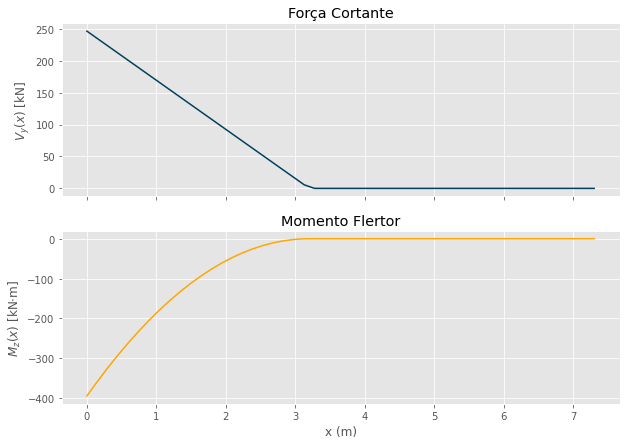

In [296]:
x = np.array(np.linspace(0,a+b,50))

Vy = np.empty(50)
Mz = np.empty(50)
for i in range(50):
  k = forca_cortante_letraB_AB(x[i], q0, a ,b)
  k1 = momento_cortante_letraB_AB(x[i], q0, a ,b)
  Vy[i] = k
  Mz[i] = k1

#print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].plot(x, Vy, c='#003f5c')
axs[0].set_title('Força Cortante')
axs[0].set_ylabel('$V_y(x)$ [kN]')
axs[1].plot(x, Mz, c='#ffa600')
axs[1].set_title('Momento Flertor')
axs[1].set_ylabel('$M_z(x)$ [kN$\cdot$m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Carregamento BC

Expressões calculadas: $$\begin{gather*}V_y(x)= -q_0<x-a>^1-\dfrac{q_0}{2b}<x-a>^2+\dfrac{q_0}{3}2b\\
 M_z(x)=-\dfrac{q_0}{2}<x-a>^2-\dfrac{q_0}{6b}<x-a>^3+\dfrac{q_0}{3}2bx-\dfrac{q_0}{3}2ab\end{gather*}$$

In [284]:
def forca_cortante_letraB_BC(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,a))-(q0/(2*b))*(heaviside_quadratic(x,a))+2*q0*b/3
  return Vy

def momento_cortante_letraB_BC(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,a))-(q0/(6*b))*(heaviside_cubic(x,a))+(2*q0*b/3)*x-q0*((2*a*b)/3)
   return Mz

Em seguida, determina-se as reações no engaste, no apoio deslizante e a força cortante na rótula:

In [285]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ','{:.1f}'.format(forca_cortante_letraB_BC(reacoes[i],q0,a,b)), 'kN')
  print('Momento no', i,': ','{:.1f}'.format(momento_cortante_letraB_BC(reacoes[i],q0,a,b)),' kN*m \n')


Força no Engaste :  210.5 kN
Momento no Engaste :  -673.5  kN*m 

Força no Rótula :  210.5 kN
Momento no Rótula :  0.0  kN*m 

Força no Apoio Deslizante :  -263.1 kN
Momento no Apoio Deslizante :  0.0  kN*m 



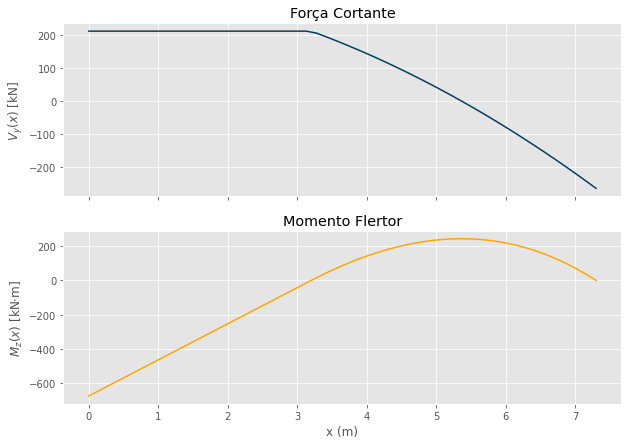

In [297]:
x = np.array(np.linspace(0,a+b,50))

Vy = np.empty(50)
Mz = np.empty(50)
for i in range(50):
  k = forca_cortante_letraB_BC(x[i], q0, a ,b)
  k1 = momento_cortante_letraB_BC(x[i], q0, a ,b)
  Vy[i] = k
  Mz[i] = k1

#print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].plot(x, Vy, c='#003f5c')
axs[0].set_title('Força Cortante')
axs[0].set_ylabel('$V_y(x)$ [kN]')
axs[1].plot(x, Mz, c='#ffa600')
axs[1].set_title('Momento Flertor')
axs[1].set_ylabel('$M_z(x)$ [kN$\cdot$m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Visualizando os diagramas de esforços internos:

Somando as forças e momentos do carregamento de AB e de BC e subtraindo os carregamentos obtidos de AC, pode se concluir que o princípio de superposição é válido. Isso porque esta diferença resulta em 0, o que leva à conclusão que:
$$\begin{gather*}
    q^{AC}(x) = q^{AB}(x)+q^{BC}(x)\\
    V^{AC}_y(x) = V^{AB}_y(x)+V^{BC}_y(x)\\
    M^{AC}_z(x) = M^{AB}_z(x)+M^{BC}_z(x)
\end{gather*}$$

In [286]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}
for i in reacoes:
  print('Diferença das forças do carregamento AC com a soma dos carregamentos AB e BC para o',i,':','{:.1f}'.format(forca_cortante_letraA(reacoes[i],q0,a,b)-(forca_cortante_letraB_AB(reacoes[i],q0,a,b)+forca_cortante_letraB_BC(reacoes[i],q0,a,b))),'kN.')
  print('Diferença dos momentos do carregamento AC com a soma dos carregamentos AB e BC para o',i,':','{:.1f}'.format(momento_cortante_letraA(reacoes[i],q0,a,b)-(momento_cortante_letraB_AB(reacoes[i],q0,a,b)+momento_cortante_letraB_BC(reacoes[i],q0,a,b))),'kN*m. \n')

Diferença das forças do carregamento AC com a soma dos carregamentos AB e BC para o Engaste : 0.0 kN.
Diferença dos momentos do carregamento AC com a soma dos carregamentos AB e BC para o Engaste : 0.0 kN*m. 

Diferença das forças do carregamento AC com a soma dos carregamentos AB e BC para o Rótula : 0.0 kN.
Diferença dos momentos do carregamento AC com a soma dos carregamentos AB e BC para o Rótula : 0.0 kN*m. 

Diferença das forças do carregamento AC com a soma dos carregamentos AB e BC para o Apoio Deslizante : -0.0 kN.
Diferença dos momentos do carregamento AC com a soma dos carregamentos AB e BC para o Apoio Deslizante : -0.0 kN*m. 



## Letra C

Expressões calculadas:$$\begin{gather*}
    \boxed{V_y(x)=-q_0<x>^1-\dfrac{q_0}{2b}<x-a>^2 +q_0(a+b)<x-a>^0- \dfrac{q_0b}{3}}\\
    \boxed{M_z(x)=-\dfrac{q_0}{2}<x>^2-\dfrac{q_0}{6b}<x-a>^3+q_0(a+b)<x-a>^1-\dfrac{q_0b}{3}x+\dfrac{q_0}{6}\left(3a^2+2ab\right)}
\end{gather*}$$

In [287]:
def forca_cortante_letraC(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,0))-(q0/(2*b))*(heaviside_quadratic(x,a))+q0*(a+b)*(heaviside_constant(x,a))-q0*(b/3)
  return Vy

def momento_cortante_letraC(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))-(q0/(6*b))*(heaviside_cubic(x,a))+q0*(a+b)*(heaviside_triangular(x,a))-q0*(b/3)*x+(q0/6)*(3*(a**2)+2*a*b)
   return Mz

Em seguida, determina-se as reações no engaste, no apoio deslizante e a força cortante na rótula:

In [288]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ','{:.2f}'.format(forca_cortante_letraC(reacoes[i],q0,a,b)), 'kN')
  print('Momento no', i,': ','{:.2f}'.format(momento_cortante_letraC(reacoes[i],q0,a,b)),' kN*m \n')

Força no Engaste :  -105.23 kN
Momento no Engaste :  730.99  kN*m 

Força no Rótula :  210.47 kN
Momento no Rótula :  0.00  kN*m 

Força no Apoio Deslizante :  -263.08 kN
Momento no Apoio Deslizante :  -0.00  kN*m 



Por fim, faz-se os gráficos dos Diagramas de Esforços Internos:

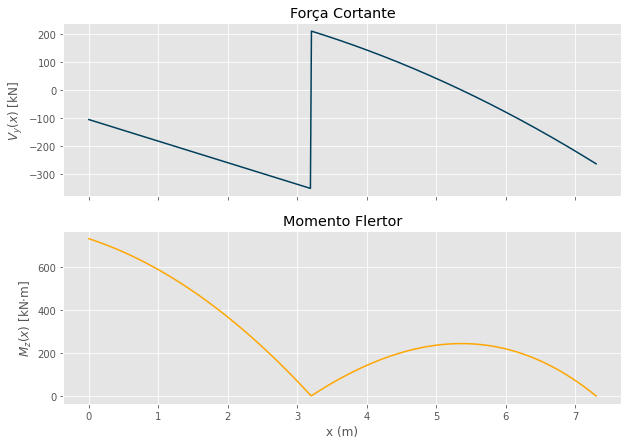

In [289]:
x = np.array(np.linspace(0,a+b,500))

Vy = np.empty(500)
Mz = np.empty(500)
for i in range(500):
  k = forca_cortante_letraC(x[i], q0, a ,b)
  k1 = momento_cortante_letraC(x[i], q0, a ,b)
  Vy[i] = k
  Mz[i] = k1

#print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].plot(x, Vy, c='#003f5c')
axs[0].set_title('Força Cortante')
axs[0].set_ylabel('$V_y(x)$ [kN]')
axs[1].plot(x, Mz, c='#ffa600')
axs[1].set_title('Momento Flertor')
axs[1].set_ylabel('$M_z(x)$ [kN$\cdot$m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

A força de reação no engaste é nulo se a intesidade da força for:

In [290]:
print('Intensidade da força necessária para que a reação no engaste seja nulo:', '{:.1f}'.format(-forca_cortante_letraA(0,q0,a,b)),'kN')

Intensidade da força necessária para que a reação no engaste seja nulo: -456.9 kN


O momento de reação no engaste é nulo se a intesidade da força for:


In [291]:
print('Intensidade da força necessária para que a reação no engaste seja nulo:', '{:.1f}'.format(-(momento_cortante_letraA(0,q0,a,b))/a),'kN')

Intensidade da força necessária para que a reação no engaste seja nulo: 333.7 kN


## Letra D

Usando a mesma expressão do momento calculado na Letra A, sendo que $b=7,3-a$, tem-se: $$\begin{gather*}
    M_z(x)=-\dfrac{q_0}{2}<x>^2-\dfrac{q_0}{6b}<x-a>^3+q_0\left(a+\dfrac{2b}{3}\right)x-q_0\left(\dfrac{a^2}{2}+\dfrac{2ab}{3}\right)
\end{gather*}$$

In [292]:
def momento_cortante_letraD(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))-(q0/(6*b))*(heaviside_cubic(x,a))+q0*(a+2*b/3)*x-q0*((a**2)/2+(2*a*b)/3)
   return Mz

In [293]:
a_ = np.array(np.linspace((a+b)/8,7*(a+b)/8,500))
b_ = Vy = np.empty(500)

for i in range(500):
  b_[i]=(a+b)-(a_[i])

Criando o gráfico do máximo e do mínimo momento para cada $a$ (posição da rótula):

A posição da rótula em que o módulo do máximo momento fletor é o menor possível é:  1.41 m


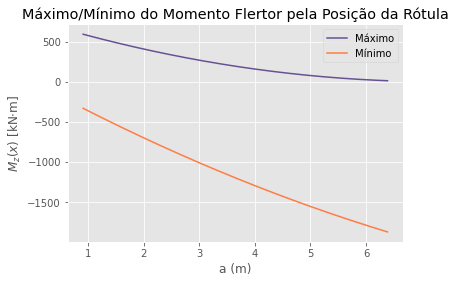

In [294]:
x = np.array(np.linspace(0,a+b,500))

Max = np.empty(500)
Min = np.empty(500)
x_aux_mod = {}

for i in range(500):
  x_aux = []
  for j in range(500):
    k1 = momento_cortante_letraD(x[j], q0, a_[i] ,b_[i])
    x_aux.append(k1)  
  Max[i] = max(x_aux)
  Min[i] = min(x_aux)
  if abs(max(x_aux)) > abs(min(x_aux)):
    x_aux_mod[a_[i]]=abs(max(x_aux))
  else:
    x_aux_mod[a_[i]]=abs(min(x_aux))

#print(x_aux_mod)
print('A posição da rótula em que o módulo do máximo momento fletor é o menor possível é: ','{:.2f}'.format(min(x_aux_mod, key=x_aux_mod.get)),'m')
plt.style.use('ggplot')
plt.plot(a_, Max, c='#665191')
plt.plot(a_, Min, c='#ff7c43')
plt.title('Máximo/Mínimo do Momento Flertor pela Posição da Rótula')
plt.ylabel('$M_z(x)$ [kN$\cdot$m]')
plt.xlabel('a (m)')
plt.legend(['Máximo','Mínimo'])

Gráfico dinâmico da variação do momento flertor com base na variação da posição da rótula. Para ver a animação, basta clicar no play na célula que contém $a$.

In [295]:
IFrame(src="https://www.desmos.com/calculator/8zlmycpebc", width=1000, height=400)